<a href="https://colab.research.google.com/github/lLoLii/Hotel-Booking/blob/main/HotelPJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# EDA


In [ ]:
df = pd.read_csv('/content/drive/My Drive/2020 /hotel_clean.csv',index_col=0)

In [ ]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,have_bb,country_name,alpha2,region,adr_pp
0,0,109,2016,January,1,1,0,1,2,0,0,BB,RUS,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,0.0,0,Transient-Party,59.94,0,1,Check-Out,0,Russian Federation,RU,EU,29.970
1,0,109,2016,January,1,1,0,1,2,2,0,BB,RUS,Online TA,TA/TO,0,0,0,H,H,0,No Deposit,240.0,0.0,0,Transient-Party,116.10,1,1,Check-Out,1,Russian Federation,RU,EU,29.025
2,1,2,2016,January,1,1,0,1,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0.0,0,Transient,89.00,0,1,No-Show,0,Portugal,PT,EU,44.500
3,0,88,2016,January,1,1,0,2,2,0,0,HB,ARG,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,241.0,0.0,0,Transient,73.46,0,2,Check-Out,0,Argentina,AR,SA,36.730
4,1,20,2016,January,1,1,0,2,2,2,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,0.0,0,Transient,119.00,0,0,Canceled,1,Portugal,PT,EU,29.750


In [ ]:
df.groupby('country_name',as_index=False)['adr'].count().nlargest(6,'adr')

,country_name,adr
84,Portugal,13285
110,United Kingdom,5702
97,Spain,3003
49,Ireland,1728
37,France,1284
39,Germany,1086


In [ ]:
df["adr_pp"] = df["adr"] / (df["adults"] + df["children"])
df_noc = df[df['is_canceled'] == 0]
df_c = df[df['is_canceled'] == 1]
room_prices = df_noc[[ "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

No handles with labels found to put in legend.


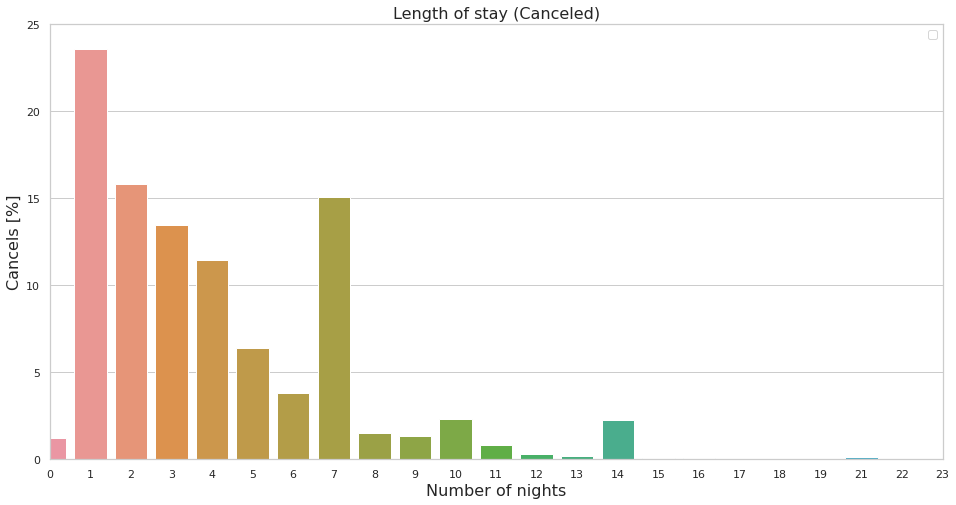

In [ ]:
df_noc["total_nights"] = df_noc["stays_in_weekend_nights"] + df_noc["stays_in_week_nights"]
num_nights_gues = list(df_noc["total_nights"].value_counts().index)
num_bookings_gues= list(df_noc["total_nights"].value_counts())
rel_bookings_gues= df_noc["total_nights"].value_counts() / sum(num_bookings_gues) * 100

gues_nights = pd.DataFrame({
                           "num_nights": num_nights_gues,
                           "rel_num_bookings": rel_bookings_gues})

plt.figure(figsize=(16, 8))
g = sns.barplot(x = "num_nights", y = "rel_num_bookings", data=gues_nights)
plt.title("Length of stay (Canceled)", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Cancels [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.ylim(0,25)
plt.show()

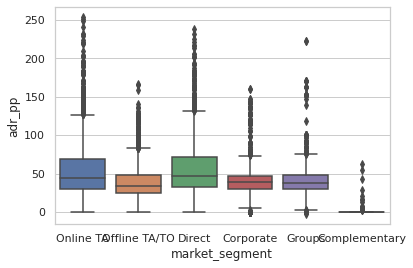

In [ ]:
sns.boxplot(x = "market_segment", y = 'adr_pp', data = df_noc)

In [ ]:
adr = df_c.groupby('customer_type')['adr'].sum().reset_index()
adr

,customer_type,adr
0,Contract,8798.51
1,Group,1469.74
2,Transient,895199.36
3,Transient-Party,82565.41


In [ ]:
adr['adr_pct'] = round(((adr['adr'] / adr['adr'].sum()) *100),2)
adr

,customer_type,adr,adr_pct
0,Contract,8798.51,0.89
1,Group,1469.74,0.15
2,Transient,895199.36,90.60
3,Transient-Party,82565.41,8.36


In [ ]:
c_type = df_c.groupby('customer_type')['adr'].count().reset_index()
c_type['c_pct'] = round(((c_type['adr'] / c_type['adr'].sum()) *100),2)
c_type

,customer_type,adr,c_pct
0,Contract,103,1.15
1,Group,11,0.12
2,Transient,7696,85.68
3,Transient-Party,1172,13.05


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

No handles with labels found to put in legend.


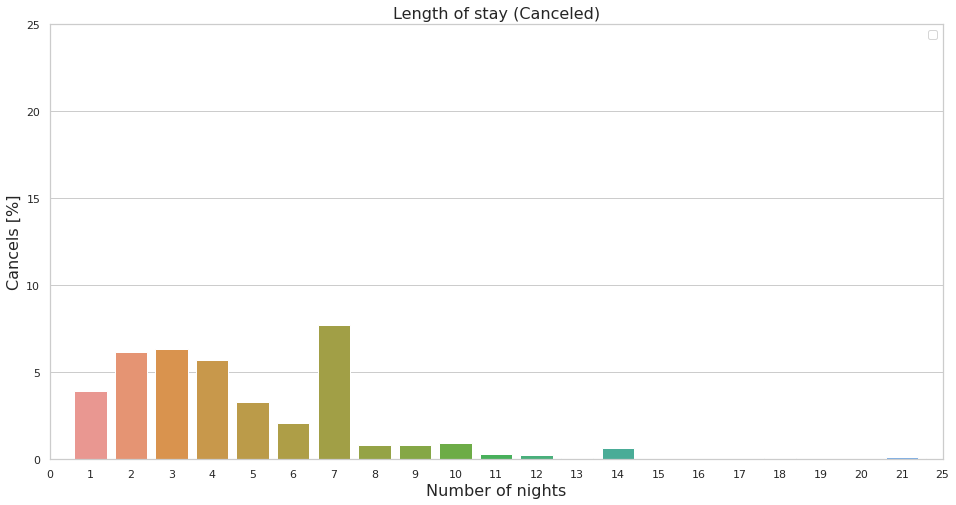

In [ ]:
df_c["total_nights"] = df_c["stays_in_weekend_nights"] + df_c["stays_in_week_nights"]
num_nights_guesc = list(df_c["total_nights"].value_counts().index)
num_bookings_guesc = list(df_c["total_nights"].value_counts())
rel_bookings_guesc = df_c["total_nights"].value_counts() / sum(num_bookings_gues) * 100

gues_nightsc = pd.DataFrame({
                           "num_nights": num_nights_guesc,
                           "rel_num_bookings": rel_bookings_guesc})

plt.figure(figsize=(16, 8))
g = sns.barplot(x = "num_nights", y = "rel_num_bookings", data=gues_nightsc)
plt.title("Length of stay (Canceled)", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Cancels [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.ylim(0,25)
plt.show()

In [ ]:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
          
yr_2 = ["January", "February", "March", "April", "May", "June", 
          "July", "August"]

In [ ]:
df.groupby('is_repeated_guest').count()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,have_bb,country_name,alpha2,region,adr_pp
is_repeated_guest,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,30094,29670,30094
1,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1644,1631,1644


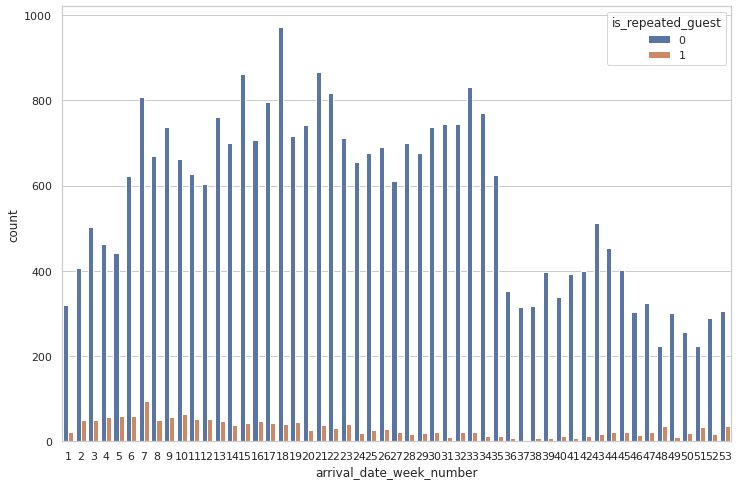

In [ ]:
plt.figure(figsize=(12, 8))
g = sns.countplot(x = "arrival_date_week_number", data=df,hue='is_repeated_guest', )


plt.show()

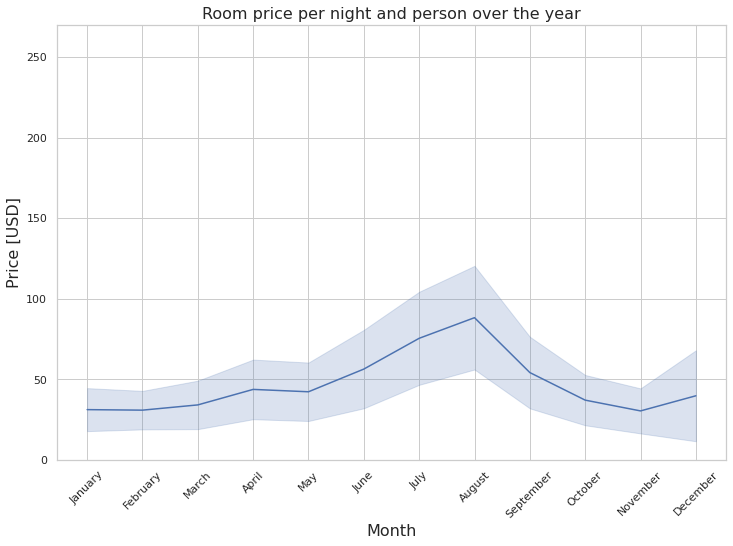

In [ ]:
room_prices_mothly = df_noc[[ "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", data=room_prices_mothly, 
             ci="sd", sizes=(2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [USD]", fontsize=16)
plt.ylim(0,270)
plt.show()

In [ ]:
df_noc[[ "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month").to_csv('adr_pp.csv')
df_noc[[ "arrival_date_month", "adr"]].sort_values("arrival_date_month").to_csv('adr.csv')

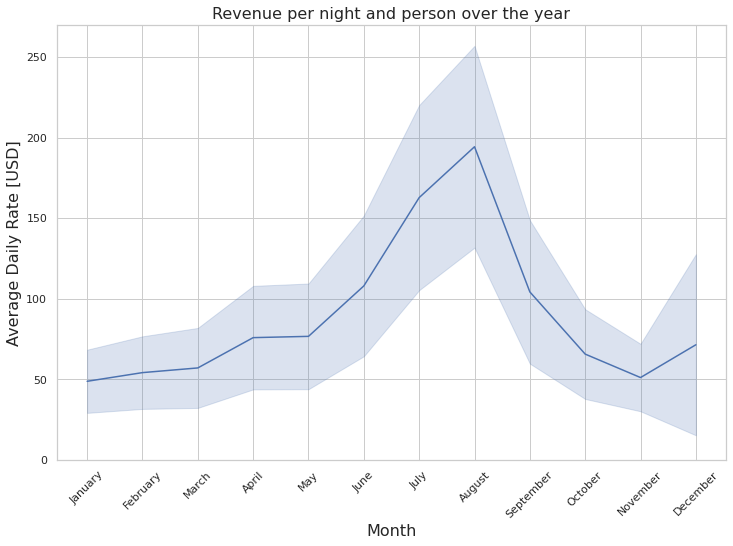

In [ ]:
room_prices_mothly = df_noc[[ "arrival_date_month", "adr"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", data=room_prices_mothly, 
             ci="sd", sizes=(2.5))
plt.title("Revenue per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate [USD]", fontsize=16)
plt.ylim(0,270)

plt.show()

In [ ]:
room_prices_oc = df_noc.loc[df_noc['arrival_date_month']=='October'][[ "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")
room_prices_au = df_noc.loc[df_noc['arrival_date_month']=='August'][[ "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")


No handles with labels found to put in legend.


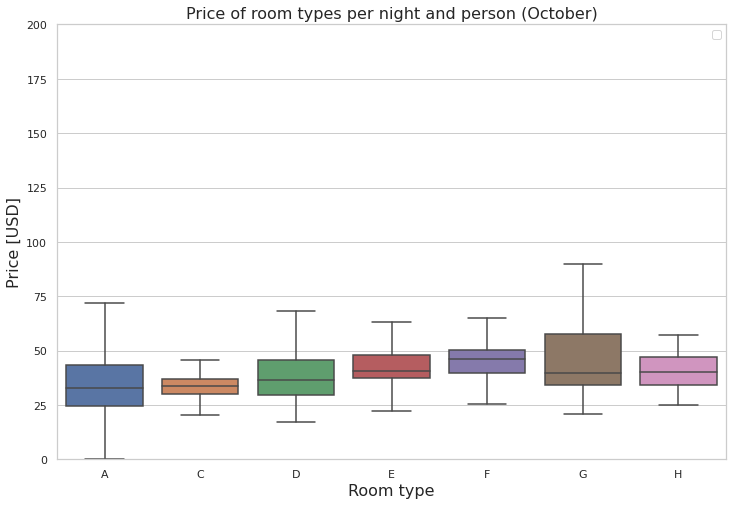

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            data=room_prices_oc, 
            fliersize=0)
plt.title("Price of room types per night and person (October)", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [USD]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 200)
plt.show()

No handles with labels found to put in legend.


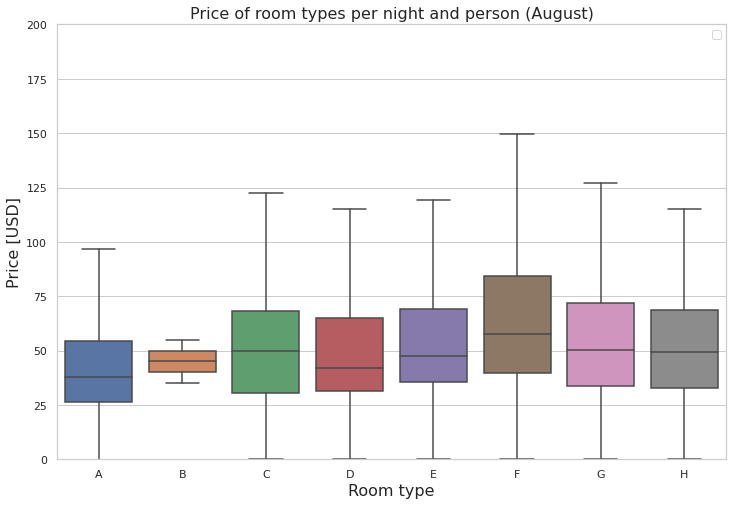

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            data=room_prices, 
            fliersize=0)
plt.title("Price of room types per night and person (August)", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [USD]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 200)
plt.show()

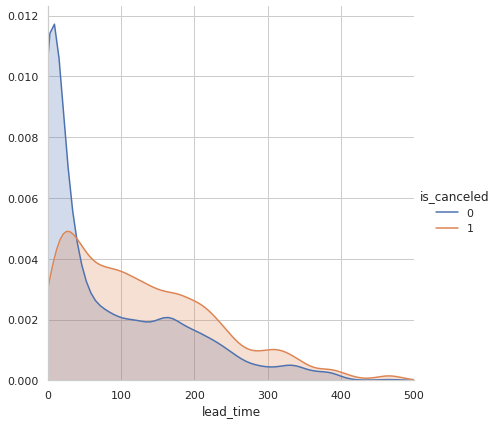

In [ ]:
(sns.FacetGrid(df, hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

# ML

In [ ]:
from IPython.display import clear_output
!pip install eli5
clear_output()

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import eli5
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.

Using TensorFlow backend.


Feature Selection & Data Transformation

In [ ]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type","agent","company"]

features = num_features + cat_features
X = df.drop(["is_canceled"], axis=1)[features]
y = df["is_canceled"]

kfolds = 4
num_transformer = SimpleImputer(strategy="constant")


cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

Fit

In [ ]:
base_models = [("DT_model", DecisionTreeClassifier(random_state=53)),
               ("RF_model", RandomForestClassifier(random_state=53,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=53,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=53, n_jobs=-1))]


split = KFold(n_splits=kfolds, shuffle=True, random_state=53)

for name, model in base_models:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

DT_model cross validation accuarcy score: 0.8211 +/- 0.0023 (std) min: 0.8175, max: 0.8232
RF_model cross validation accuarcy score: 0.8571 +/- 0.003 (std) min: 0.8528, max: 0.8601
LR_model cross validation accuarcy score: 0.808 +/- 0.0037 (std) min: 0.8032, max: 0.8133
XGB_model cross validation accuarcy score: 0.8254 +/- 0.0045 (std) min: 0.821, max: 0.8327


In [ ]:
rf_model_enh = RandomForestClassifier(n_estimators=160,
                               max_features=0.5,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

split = KFold(n_splits=kfolds, shuffle=True, random_state=52)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model_enh)])
cv_results = cross_val_score(model_pipe, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"Enhanced RF model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Enhanced RF model cross validation accuarcy score: 0.8626 +/- 0.0033 (std) min: 0.8592, max: 0.8665


In [ ]:
cat_features_non_dep = ["arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","customer_type"]

features_non_dep = num_features + cat_features_non_dep
X_non_dep = df.drop(["is_canceled"], axis=1)[features_non_dep]


preprocessor_non_dep = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features_non_dep)])

X_non_dep = df.drop(["is_canceled"], axis=1)[features_non_dep]

rf_model_non_dep = RandomForestClassifier(random_state=42) 

kfolds=4
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor_non_dep),
                              ('model', rf_model_non_dep)])
cv_results = cross_val_score(model_pipe, 
                                 X_non_dep, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"RF model without deposit_type feature cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

RF model without deposit_type feature cross validation accuarcy score: 0.8506 +/- 0.0032 (std) min: 0.847, max: 0.8552


In [ ]:
model_pipe.fit(X_non_dep,y)

onehot_columns = list(model_pipe.named_steps['preprocessor'].
                      named_transformers_['cat'].
                      named_steps['onehot'].
                      get_feature_names(input_features=cat_features_non_dep))

feat_imp_list = num_features + onehot_columns

feat_imp_df_non_dep = eli5.formatters.as_dataframe.explain_weights_df(
    model_pipe.named_steps['model'],
    feature_names=feat_imp_list)

In [ ]:
fig = px.bar(feat_imp_df_non_dep.head(3)),y='feature',x='weight',orientation='h',color='feature')
fig.update_layout(showlegend=False)

In [ ]:
feat_imp_df_non_dep.head().replace({'arrival_date_week_number':'arrival_date_week_number_high_season'})

NameError: ignored

Extract Feature Importance

In [ ]:
max_score

0.8665

In [ ]:
df.isna().sum()

is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                             0
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_type                       0
adr         

In [ ]:
df['agent'].nunique()

162